In [1]:
# Imports et configuration
import sys
sys.path.append('../')

from src.data_manager import DataManager
from src.matcher import SimpleMatcher
from src.utils import print_recommendations
import pandas as pd

In [2]:
# Charger les données
dm = DataManager()
profiles = dm.load_profiles()
jobs = dm.load_jobs()

print(f"\nProfils disponibles:")
for p in profiles:
    print(f"  - {p['id']}: {p['name']} ({', '.join(p['skills'][:2])}...)")

print(f"\nOffres disponibles:")
for j in jobs:
    print(f"  - {j['id']}: {j['title']} @ {j['company']}")

✓ 2 profils chargés
✓ 3 offres chargées

Profils disponibles:
  - user_001: Jean Dupont (Python, Machine Learning...)
  - user_002: Marie Martin (JavaScript, React...)

Offres disponibles:
  - job_001: Développeur Python IA @ TechCorp
  - job_002: Ingénieur Data Science @ DataSolutions
  - job_003: Frontend Developer React @ WebStudio


In [3]:
# Tester le matching simple
matcher = SimpleMatcher()

# Tester pour chaque profil
all_recommendations = {}
for profile in profiles:
    recommendations = matcher.recommend(profile, jobs)
    all_recommendations[profile['id']] = recommendations
    print_recommendations(profile['name'], recommendations)


Recommandations pour Jean Dupont

1. Développeur Python IA - TechCorp
   Location: Paris
   Salary: 40000 - 55000
   Score de match: 60.70%
   URL: #

2. Ingénieur Data Science - DataSolutions
   Location: Lyon
   Salary: 38000 - 52000
   Score de match: 50.29%
   URL: #

3. Frontend Developer React - WebStudio
   Location: Paris
   Salary: 32000 - 48000
   Score de match: 31.36%
   URL: #

Recommandations pour Marie Martin

1. Frontend Developer React - WebStudio
   Location: Paris
   Salary: 32000 - 48000
   Score de match: 37.60%
   URL: #

2. Ingénieur Data Science - DataSolutions
   Location: Lyon
   Salary: 38000 - 52000
   Score de match: 30.57%
   URL: #


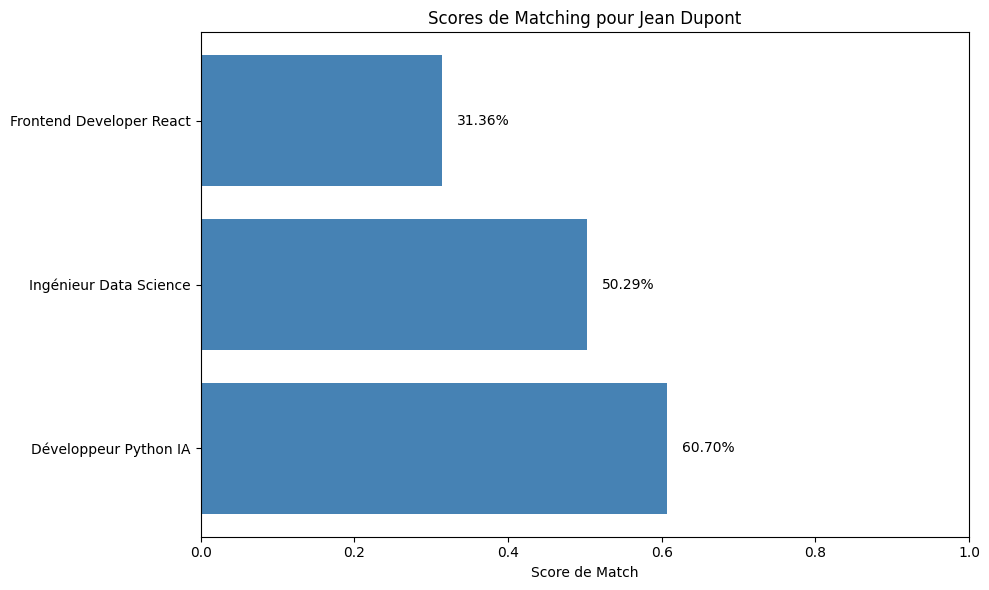

In [4]:
# Analyse des scores
import matplotlib.pyplot as plt
import numpy as np

# Visualiser les scores pour le premier profil
profile = profiles[0]
recommendations = all_recommendations[profile['id']]

jobs_titles = [r['job_title'] for r in recommendations]
scores = [r['score'] for r in recommendations]

plt.figure(figsize=(10, 6))
plt.barh(jobs_titles, scores, color='steelblue')
plt.xlabel('Score de Match')
plt.title(f'Scores de Matching pour {profile["name"]}')
plt.xlim(0, 1)
for i, v in enumerate(scores):
    plt.text(v + 0.02, i, f'{v:.2%}', va='center')
plt.tight_layout()
plt.show()